In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
h_data = pd.read_csv("/content/historical_data.csv")
s_data = pd.read_csv("/content/fear_greed_index.csv")

### Exploring Historical data

In [3]:
h_data.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
h_data.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [5]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
h_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [7]:
h_data.shape

(211224, 16)

In [8]:
h_data.duplicated().sum()

np.int64(0)

In [9]:
h_data['Coin'].nunique()

246

In [10]:
unique_coins = h_data['Coin'].unique()
print(unique_coins)

['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT' 'WCT' 'OGN' 'HYPER' 'ZORA' 'BIO' 'INIT' 'TURBO' 'ARB' 

In [11]:
#converting TimeStamp column to datetime
h_data['Date'] = pd.to_datetime(h_data['Timestamp IST'], format='mixed').dt.date

In [12]:
h_data['Date']

,Date
0,2024-02-12
1,2024-02-12
2,2024-02-12
3,2024-02-12
4,2024-02-12
...,...
211219,2025-04-25
211220,2025-04-25
211221,2025-04-25
211222,2025-04-25


In [13]:
print("Start date:", h_data['Date'].min())
print("End date:", h_data['Date'].max())

Start date: 2023-01-05
End date: 2025-12-04


In [14]:
h_data.drop('Timestamp IST', axis=1, inplace=True)

### Exploring the Sentiment Data

In [15]:
s_data.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2/1/2018
1,1517549400,15,Extreme Fear,2/2/2018
2,1517635800,40,Fear,2/3/2018
3,1517722200,24,Extreme Fear,2/4/2018
4,1517808600,11,Extreme Fear,2/5/2018


In [16]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [17]:
s_data.shape

(2644, 4)

In [18]:
s_data.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [19]:
s_data.duplicated().sum()

np.int64(0)

In [20]:
s_data['Date'] = pd.to_datetime(s_data['date']).dt.date

In [21]:
s_data['Date']

,Date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
...,...
2639,2025-04-28
2640,2025-04-29
2641,2025-04-30
2642,2025-05-01


In [22]:
s_data.drop('date', axis=1, inplace=True)

In [23]:
print("Start date:", s_data['Date'].min())
print("End date:", s_data['Date'].max())

Start date: 2018-02-01
End date: 2025-05-02


In [24]:
data = pd.merge(s_data, h_data, on='Date', how='inner')

In [25]:
data.head(5)

,timestamp,value,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1672896600,29,Fear,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12
1,1672896600,29,Fear,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12
2,1672896600,29,Fear,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12
3,1683869400,49,Neutral,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,1.700000e+12
4,1683869400,49,Neutral,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,1.700000e+12


In [26]:
data.shape

(167857, 19)

In [27]:
print("Start date:", data['Date'].min())
print("End date:", data['Date'].max())

Start date: 2023-01-05
End date: 2025-05-02


In [28]:
data.isnull().sum()

,0
timestamp,0
value,0
classification,0
Date,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0


In [29]:
data.duplicated().sum()

np.int64(0)

### EDA and Analysis

In [30]:
print(data[['Closed PnL', 'Size USD']].describe())

          Closed PnL      Size USD
count  167857.000000  1.678570e+05
mean       48.853074  5.389755e+03
std       853.621489  3.699618e+04
min   -117990.104100  0.000000e+00
25%         0.000000  1.778500e+02
50%         0.000000  5.632000e+02
75%         5.340160  2.014430e+03
max    115287.000000  3.921431e+06



-Closed PnL
1.   Mean: $48.85, Median: $0, Max: $115,287, Min: -$117,990.
2.   Wide variability suggests some trades are highly profitable or loss-making.

-Size USD
1. Mean: $5389, Median: $536, Max: $3.92M
2. Large standard deviation shows significat variation in trader sizes.



In [31]:
data['win'] = data['Closed PnL'] > 0
win_rate = data['win'].mean()
print(f"Overall win rate: {win_rate:.2%}")

Overall win rate: 40.97%


Less than Half of traders are profitable, indicating a challenging market overall.

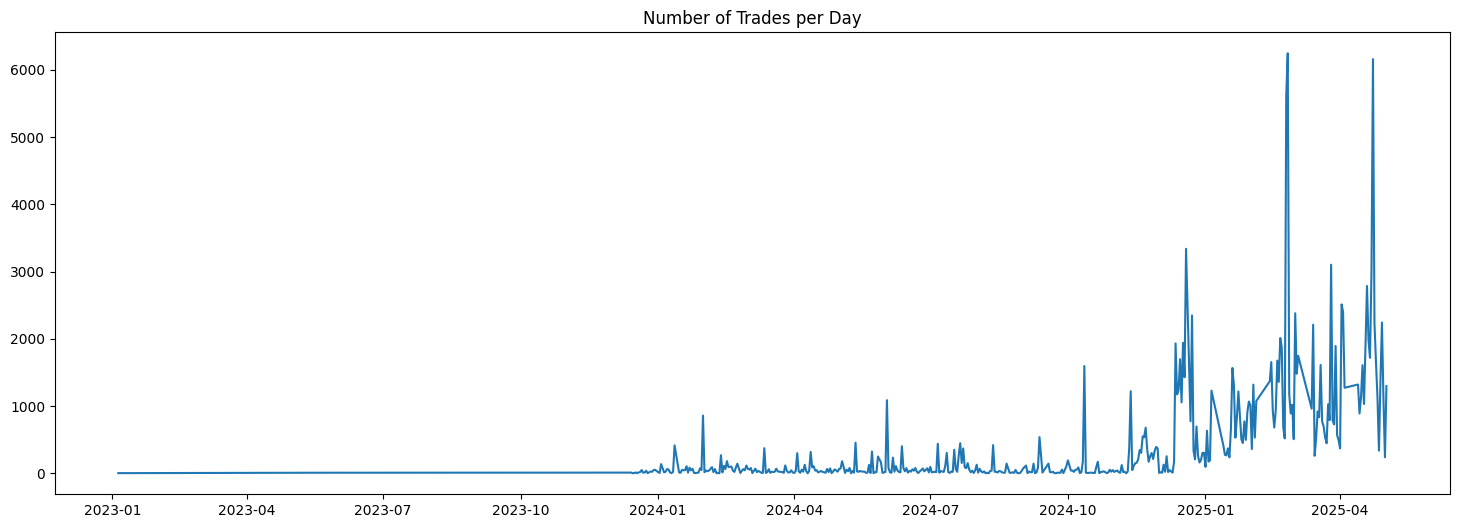

In [32]:
# Trades per day
trades_per_day = data.groupby('Date').size()
plt.figure(figsize=(18, 6))
plt.plot(trades_per_day)
plt.title('Number of Trades per Day')
plt.show()

Low activity until mid-2024, followed by sharp spikes (up to 6,000 trades/day) toward late 2024 and early 2025.
Possibly due to market events or increased trader activity.

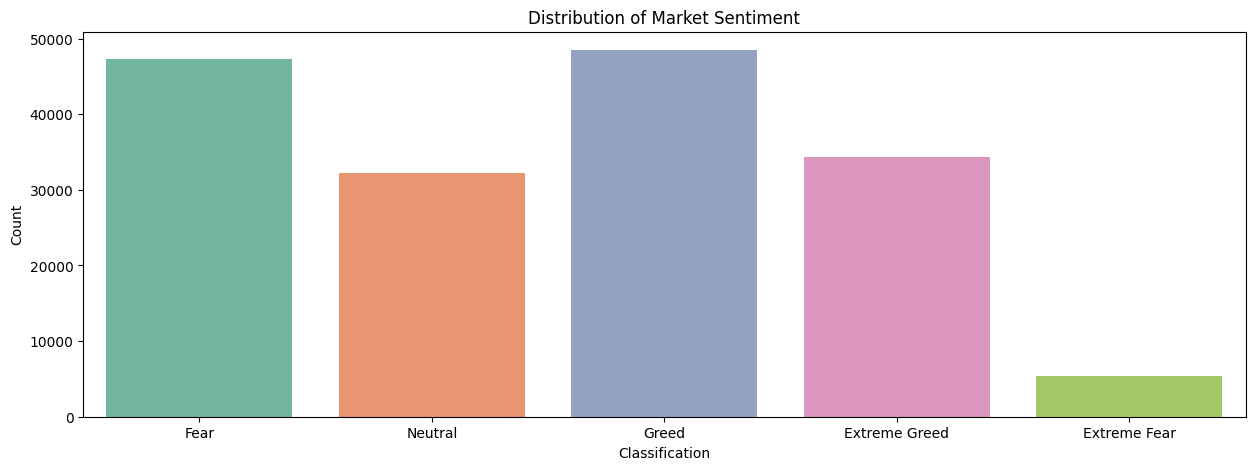

In [33]:
# Sentiment distribution
plt.figure(figsize=(15, 5))
sns.countplot(x='classification', data=data, palette='Set2')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Distribution of Market Sentiment')
plt.show()

###The market is most often in Fear or Greed states, with Extreme Fear being the least common.

In [34]:
# Performance by sentiment
perf_by_sentiment = data.groupby('classification').agg({
    'Closed PnL': ['mean', 'count'],
    'win': 'mean',
    'Size USD': 'mean'
})
print(perf_by_sentiment)

               Closed PnL              win     Size USD
                     mean  count      mean         mean
classification                                         
Extreme Fear    47.446302   5411  0.390501  3816.440098
Extreme Greed   73.144030  34393  0.458727  3265.794510
Fear            56.544720  47315  0.387890  7153.414717
Greed           35.652184  48492  0.403077  5848.453393
Neutral         31.746470  32246  0.402593  4641.500274


1. Highest average profit in Extreme Greed($73.14), lowest in Neutral(31.75).
2. Highest win rate in Extreme Greed(45.8%), lowest in Fear(38.7%)
3. Larger positions are taken during Fear, possibly due to perceived bargains.

### Extreme Greed offers the highest win rate and profit potential while Fear period see larger trader but lower win rates. Neutral markets are least profitable on average.

Text(0, 0.5, 'Average PnL')

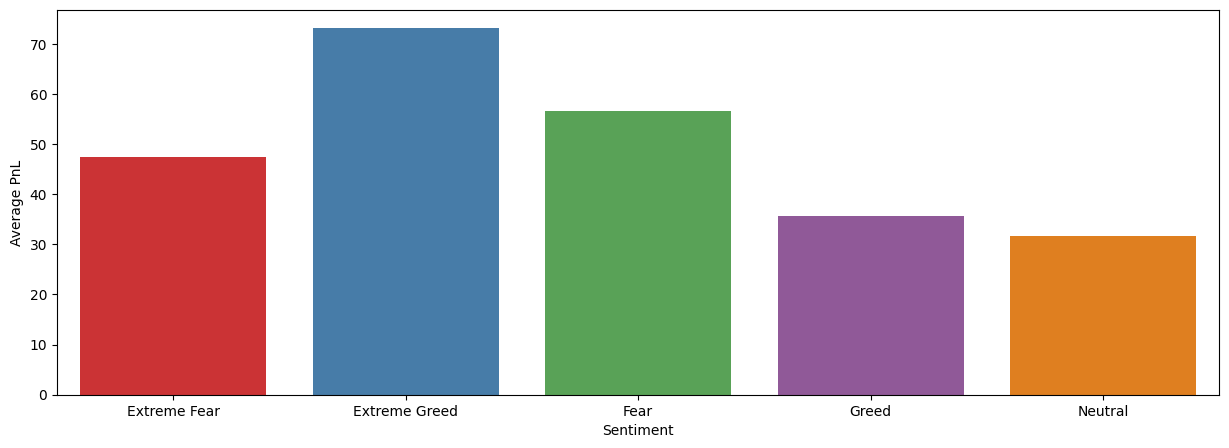

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x=perf_by_sentiment.index, y=perf_by_sentiment['Closed PnL']['mean'], palette='Set1')
plt.xlabel('Sentiment')
plt.ylabel('Average PnL')

Text(0, 0.5, 'Average Win rate')

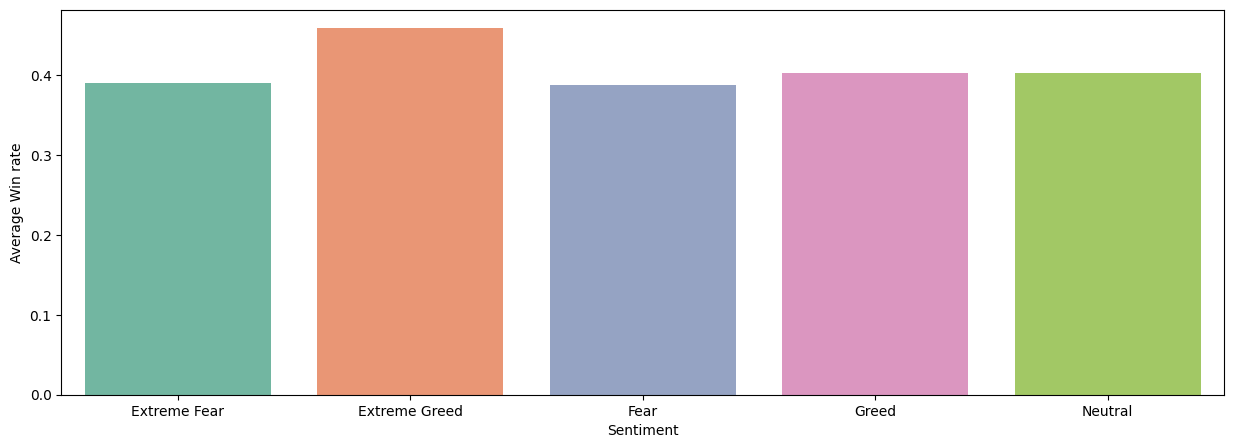

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x=perf_by_sentiment.index, y=perf_by_sentiment['win']['mean'], palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Average Win rate')

Text(0, 0.5, 'Average Size USD')

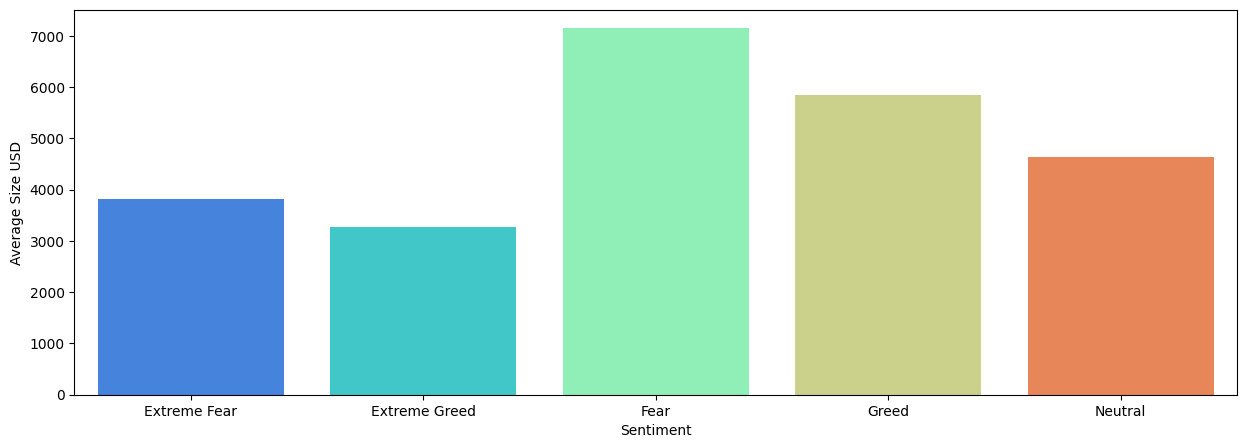

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x=perf_by_sentiment.index, y=perf_by_sentiment['Size USD']['mean'], palette='rainbow')
plt.xlabel('Sentiment')
plt.ylabel('Average Size USD')

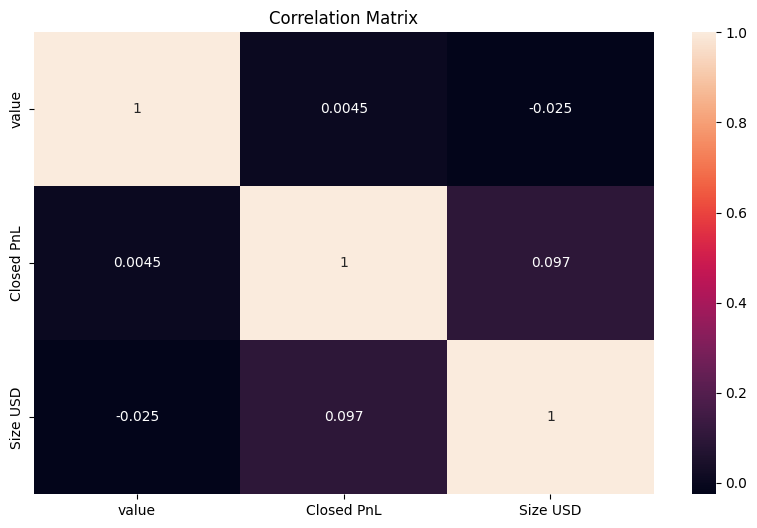

In [38]:
# Correlation
plt.figure(figsize=(10, 6))
correlation = data[['value', 'Closed PnL', 'Size USD']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

Value has no direct relationship with Closed PnL or Size USD

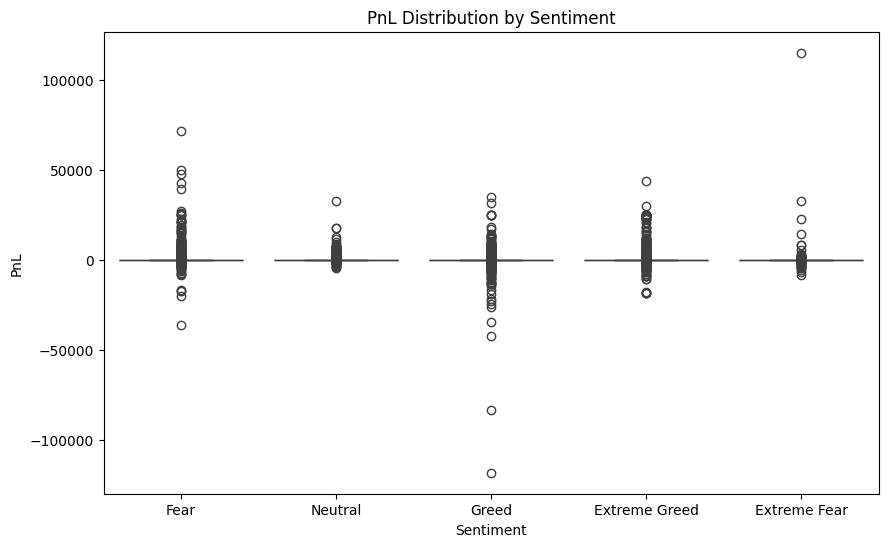

In [39]:
# Box plot of PnL by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=data)
plt.xlabel('Sentiment')
plt.ylabel('PnL')
plt.title('PnL Distribution by Sentiment')
plt.show()

### Extreme Fear and Fear show potential for high profits (outliers), while Greed and Extreme Greed have a higher risk of losses. Neutral markets appear more balanced.

In [40]:
from sklearn.cluster import KMeans

In [41]:
trader_stats = data.groupby('Account').agg({'Closed PnL': 'mean', 'Size USD': 'mean', 'Date': 'count'})
kmeans = KMeans(n_clusters=3, random_state=42)
trader_stats['cluster'] = kmeans.fit_predict(trader_stats)
data = data.merge(trader_stats[['cluster']], on='Account')

In [42]:
performance = data.groupby(['cluster', 'classification'])['Closed PnL'].mean().reset_index()

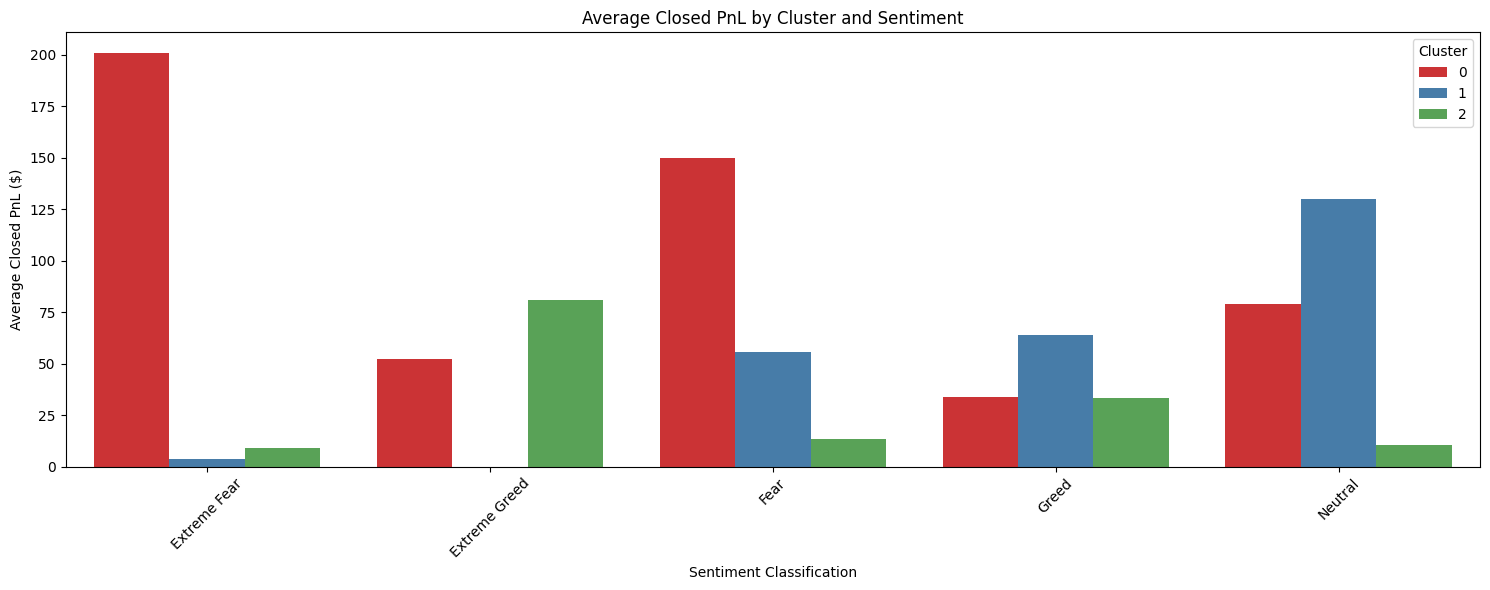

In [43]:
plt.figure(figsize=(15, 6))
sns.barplot(x='classification', y='Closed PnL', hue='cluster', data=performance, palette='Set1')

# Customize the plot
plt.title('Average Closed PnL by Cluster and Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL ($)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()

# Show the plot
plt.show()

### Different trader types (clusters 0,1,2) perform optimally under different sentiments,Like 0 ---> in Fear and 1 ---> in Neutral suggesting segmentation-based strategies.

# Overall Implication & Limitations of the Analysis:-

- Implications


1.   Buy during Extreme Fear for high profit chances, but use stop-losses.
2.   Trade with the trend in Extreme Greed for Better Win rates.
3. Tailor startegies by trader type
4. Limit big trades in Greed to avoid losses.

- Limitations

1. Outliers may skew typical results
2. In clustering I have assume 3 groups only which can miss other possible pattern.

